In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# View columns
df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,245432.677854,246738.825483,...,791948.457328,793408.230398,794599.852526,795863.590426,798610.346328,800988.123949,802979.422935,803917.993231,804753.083437,806834.297715
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,220928.091521,221262.600702,...,973022.444433,970929.261887,965223.774171,956361.785303,949828.349900,943697.592592,938107.363686,934992.524774,934157.569009,936303.715203
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,102546.036885,102519.982633,...,269708.479643,269518.649694,269176.026615,268249.821977,267065.831117,265900.736999,264737.310366,263806.840662,262982.008823,262302.147616
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,147939.513081,147979.038063,...,308442.182452,309331.642618,310288.629416,310767.551141,310843.333667,310664.928500,310400.180969,310643.134854,311006.708011,312024.556923
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,99103.119117,99195.124970,...,255528.900970,255098.128174,254685.684605,253665.303695,252438.671164,251077.227704,250057.921165,249388.806977,249026.870087,248761.061540


In [2]:
# View all columns first (optional, to inspect date format)
print(df.columns[:20])

# Select only the columns that are monthly dates (start with '20')
date_columns = [col for col in df.columns if col[:4].isdigit()]

# Keep key columns + date columns
df = df[['RegionName', 'State'] + date_columns]

# Drop rows that have too many missing monthly values
df.dropna(thresh=len(date_columns) - 5, inplace=True)  # allow up to 5 missing months

# Add average home price over the available years
df['AvgPrice'] = df[date_columns].mean(axis=1)

# Preview cleaned data
df.head()


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
       '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31'],
      dtype='object')


,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,AvgPrice
0,New York,NY,245432.677854,246738.825483,248075.898690,250648.657894,253260.155104,256067.180691,259044.905015,261838.887234,...,793408.230398,794599.852526,795863.590426,798610.346328,800988.123949,802979.422935,803917.993231,804753.083437,806834.297715,552192.327427
1,Los Angeles,CA,220928.091521,221262.600702,222242.468759,224197.745858,226639.639431,229001.444653,231400.126035,233874.738012,...,970929.261887,965223.774171,956361.785303,949828.349900,943697.592592,938107.363686,934992.524774,934157.569009,936303.715203,553777.565559
2,Houston,TX,102546.036885,102519.982633,102378.117766,102336.185561,102320.571310,102493.174011,102704.658379,103027.383165,...,269518.649694,269176.026615,268249.821977,267065.831117,265900.736999,264737.310366,263806.840662,262982.008823,262302.147616,158387.535180
3,Chicago,IL,147939.513081,147979.038063,148348.924388,149304.176224,150526.297048,151830.842017,153014.980194,154495.287213,...,309331.642618,310288.629416,310767.551141,310843.333667,310664.928500,310400.180969,310643.134854,311006.708011,312024.556923,236533.587537
4,San Antonio,TX,99103.119117,99195.124970,99266.904351,99396.304534,98950.960955,98336.391348,97665.492002,97548.851396,...,255098.128174,254685.684605,253665.303695,252438.671164,251077.227704,250057.921165,249388.806977,249026.870087,248761.061540,154531.774136


C:\Users\ibrah\AppData\Local\Temp\ipykernel_35272\3864608927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")


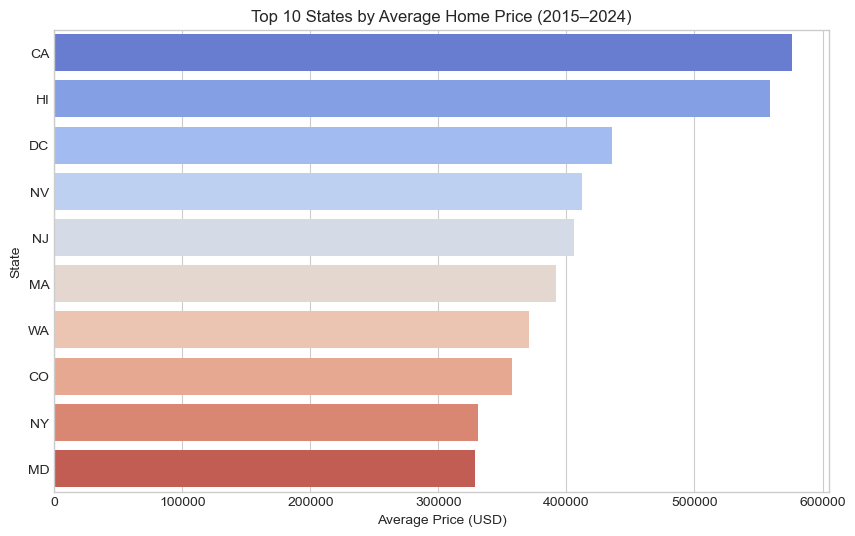

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Group by state and compute average price
state_avg = df.groupby('State')['AvgPrice'].mean().sort_values(ascending=False).head(10)

# Plot top 10 states by average price
plt.figure(figsize=(10,6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title("Top 10 States by Average Home Price (2015–2024)")
plt.xlabel("Average Price (USD)")
plt.ylabel("State")
plt.show()



C:\Users\ibrah\AppData\Local\Temp\ipykernel_35272\212590397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GrowthRate', y='RegionName', data=top_growth, palette="viridis")


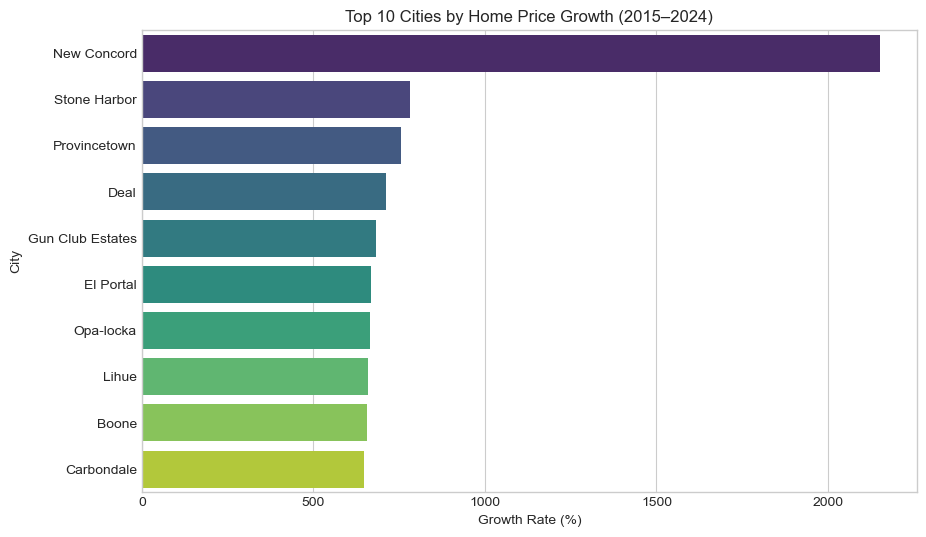

In [4]:
# Compute growth rate = (latest - earliest) / earliest * 100
df['GrowthRate'] = ((df[date_columns[-1]] - df[date_columns[0]]) / df[date_columns[0]]) * 100

# Top 10 cities by growth
top_growth = df.sort_values('GrowthRate', ascending=False).head(10)

# Plot top growth cities
plt.figure(figsize=(10,6))
sns.barplot(x='GrowthRate', y='RegionName', data=top_growth, palette="viridis")
plt.title("Top 10 Cities by Home Price Growth (2015–2024)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("City")
plt.show()


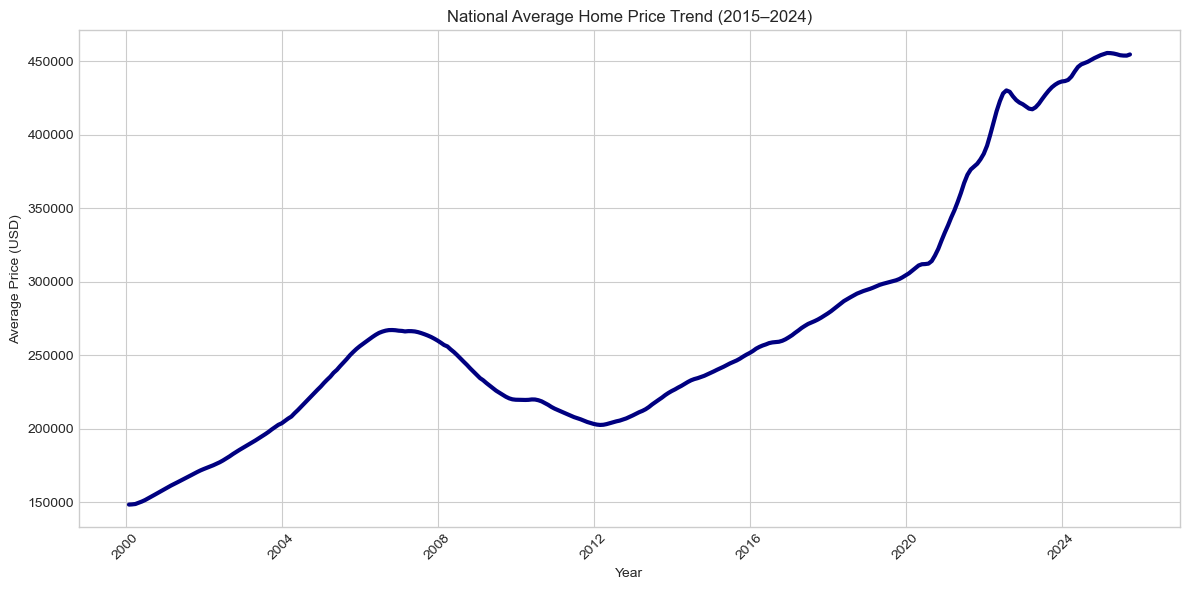

In [5]:
# Compute mean price per month across all cities
national_trend = df[date_columns].mean()

# Convert string column names to datetime for proper x-axis labels
dates = pd.to_datetime(national_trend.index, errors='coerce')

# Plot national trend
plt.figure(figsize=(12,6))
plt.plot(dates, national_trend.values, linewidth=3, color='navy')
plt.title("National Average Home Price Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



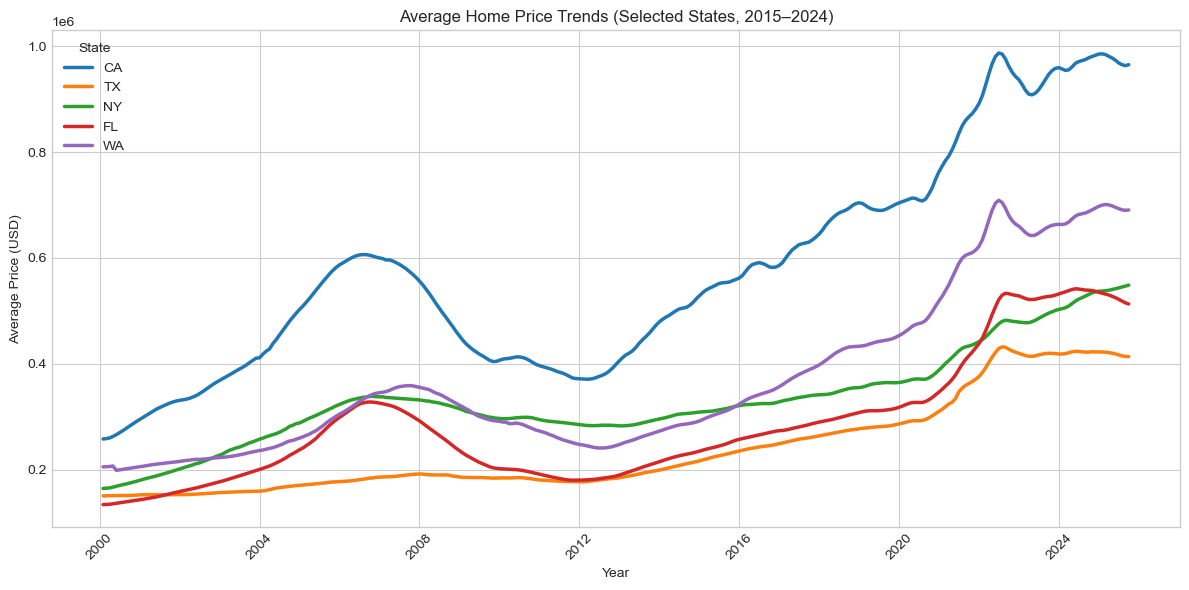

In [6]:
# Pick a few states to compare
states_to_compare = ['CA', 'TX', 'NY', 'FL', 'WA']

# Filter dataset for those states
state_trends = df[df['State'].isin(states_to_compare)]

# Convert column names to datetime for x-axis
dates = pd.to_datetime(date_columns, errors='coerce')

# Plot average price per state over time
plt.figure(figsize=(12,6))
for state in states_to_compare:
    subset = state_trends[state_trends['State'] == state]
    plt.plot(dates, subset[date_columns].mean(), label=state, linewidth=2.5)

plt.legend(title="State")
plt.title("Average Home Price Trends (Selected States, 2015–2024)")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [7]:
df.to_csv("cleaned_housing_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_housing_data.csv'")


Cleaned dataset saved as 'cleaned_housing_data.csv'


Libraries loaded. Starting script...
Successfully loaded 'City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
Data cleaned and filtered.
State-level data prepared. Last date of historical data: 2025-09-30
Starting model training and forecasting with Prophet...
... processing CA


C:\Users\ibrah\AppData\Local\Temp\ipykernel_35272\2149380330.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(thresh=len(date_columns) - 5, inplace=True)
18:47:25 - cmdstanpy - INFO - Chain [1] start processing
18:47:28 - cmdstanpy - INFO - Chain [1] done processing
18:47:28 - cmdstanpy - INFO - Chain [1] start processing
18:47:28 - cmdstanpy - INFO - Chain [1] done processing


... processing CO


18:47:28 - cmdstanpy - INFO - Chain [1] start processing


... processing NY


18:47:28 - cmdstanpy - INFO - Chain [1] done processing
18:47:29 - cmdstanpy - INFO - Chain [1] start processing
18:47:29 - cmdstanpy - INFO - Chain [1] done processing


... processing TX


18:47:29 - cmdstanpy - INFO - Chain [1] start processing
18:47:29 - cmdstanpy - INFO - Chain [1] done processing


... processing WA
All state models trained and forecasts complete.
Generating forecast plot...
Combined forecast plot saved as 'state_forecast_plot_prophet.png'


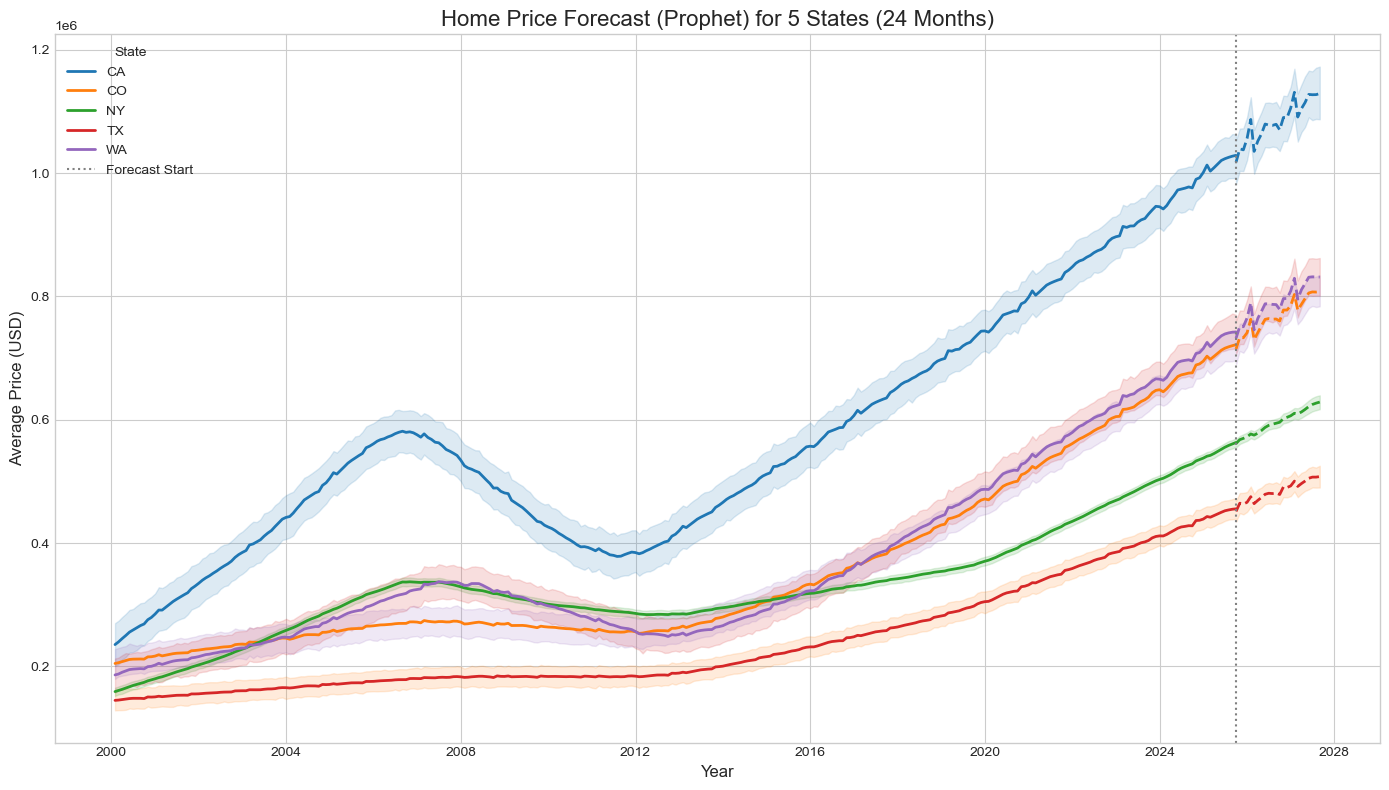


--- Future Predicted Prices (Next 24 Months) ---
State                CA         CO         NY         TX         WA
2025-10-01 1,017,665.42 714,731.52 561,470.82 451,476.27 732,302.47
2025-11-01 1,039,231.82 733,483.75 567,717.53 464,733.62 751,255.10
2025-12-01 1,037,617.54 732,932.97 569,832.72 463,245.44 750,859.77
2026-01-01 1,056,035.71 741,089.25 572,403.03 466,214.92 765,112.04
2026-02-01 1,086,934.12 762,971.66 576,937.25 475,307.26 789,693.05
2026-03-01 1,035,190.56 730,007.42 575,081.49 463,992.97 745,810.87
2026-04-01 1,051,941.42 741,347.11 578,247.32 469,330.74 764,509.76
2026-05-01 1,063,199.25 752,214.51 582,533.49 473,887.74 775,704.51
2026-06-01 1,079,457.70 762,791.01 587,581.41 479,168.39 788,007.42
2026-07-01 1,077,816.14 764,041.83 590,938.79 480,803.71 787,878.07
2026-08-01 1,077,289.05 762,997.00 592,822.43 480,357.73 787,087.35
2026-09-01 1,079,058.94 763,359.40 594,366.54 481,220.92 786,750.47
2026-10-01 1,070,085.49 760,159.57 595,958.39 478,823.77 778,822.0

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings

# --- 0. Setup ---
# Suppress harmless warnings from Prophet
warnings.filterwarnings('ignore', message='Making seasonal components with period=365.25.*')
plt.style.use("seaborn-v0_8-whitegrid")
print("Libraries loaded. Starting script...")

# --- 1. Load and Clean Original Data ---
try:
    df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
    print("Successfully loaded 'City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'")
except FileNotFoundError:
    print("ERROR: File not found.")
    print("Please make sure 'City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv' is in the same folder as your script.")
    exit()

# Select only the columns that are monthly dates
date_columns = [col for col in df.columns if col[:4].isdigit()]

# Keep key columns + date columns
df_cleaned = df[['RegionName', 'State'] + date_columns]

# Drop rows that have too many missing monthly values
df_cleaned.dropna(thresh=len(date_columns) - 5, inplace=True)

print("Data cleaned and filtered.")

# --- 2. Prepare State-Level Time Series ---
states_to_predict = ['CA', 'TX', 'NY', 'WA', 'CO']
df_filtered = df_cleaned[df_cleaned['State'].isin(states_to_predict)]

# Group by state and calculate the average price for each month
state_level_ts = df_filtered.groupby('State')[date_columns].mean().T

# Convert the index (which are date strings) to datetime objects
state_level_ts.index = pd.to_datetime(state_level_ts.index)

last_history_date = state_level_ts.index.max()
print(f"State-level data prepared. Last date of historical data: {last_history_date.date()}")

# --- 3. Train Models and Forecast with Prophet ---

all_forecasts_df = pd.DataFrame()
all_actuals_df = pd.DataFrame()

n_future_months = 24 # How many months to predict into the future

print("Starting model training and forecasting with Prophet...")

for state in state_level_ts.columns:
    print(f"... processing {state}")
    
    # --- Prepare data for Prophet ---
    # Prophet requires two columns: 'ds' (date) and 'y' (value)
    prophet_df = state_level_ts[[state]].reset_index()
    prophet_df.columns = ['ds', 'y']
    
    # --- Training ---
    # We set 'multiplicative' seasonality because housing price swings
    # (e.g., a 5% summer bump) grow as the price grows.
    model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)
    model.fit(prophet_df)
    
    # --- Forecasting ---
    # Create a DataFrame for future dates
    future = model.make_future_dataframe(periods=n_future_months, freq='MS') # 'MS' = Month Start
    
    # Make the forecast
    forecast = model.predict(future)
    
    # --- Store Results ---
    forecast['State'] = state
    all_forecasts_df = pd.concat([all_forecasts_df, forecast], ignore_index=True)
    
    # Store actuals for plotting
    actuals_df = prophet_df.copy()
    actuals_df['State'] = state
    all_actuals_df = pd.concat([all_actuals_df, actuals_df], ignore_index=True)

print("All state models trained and forecasts complete.")

# --- 4. Plot the Combined Forecasts ---

print("Generating forecast plot...")
plt.figure(figsize=(14, 8))

# Plot historical data
# 'yhat' is the name Prophet gives to the forecasted value
sns.lineplot(
    data=all_forecasts_df[all_forecasts_df['ds'] <= last_history_date],
    x='ds',
    y='yhat',
    hue='State',
    linewidth=2,
    legend=True
)

# Plot forecasted data
sns.lineplot(
    data=all_forecasts_df[all_forecasts_df['ds'] > last_history_date],
    x='ds',
    y='yhat',
    hue='State',
    linewidth=2,
    linestyle='--',
    legend=False # Avoid duplicate legend entries
)

# Plot uncertainty intervals (the shaded area)
for state in states_to_predict:
    state_fcst = all_forecasts_df[all_forecasts_df['State'] == state]
    plt.fill_between(
        state_fcst['ds'],
        state_fcst['yhat_lower'],
        state_fcst['yhat_upper'],
        color=sns.color_palette()[states_to_predict.index(state)], # Match line color
        alpha=0.15,
        label='_nolegend_'
    )

# Add a vertical line to show where history ends and forecast begins
plt.axvline(last_history_date, color='gray', linestyle=':', label='Forecast Start')

# Tidy up the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = {}
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels[l] = h
        
plt.legend(unique_labels.values(), unique_labels.keys(), title='State')

plt.title(f"Home Price Forecast (Prophet) for 5 States ({n_future_months} Months)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.tight_layout()
plt.savefig("state_forecast_plot_prophet.png") # Save the plot to a file
print("Combined forecast plot saved as 'state_forecast_plot_prophet.png'")

# Show the plot
plt.show()

# --- 5. Show Numeric Values ---

print("\n--- Future Predicted Prices (Next 24 Months) ---")

# Filter for just the future predictions
future_predictions = all_forecasts_df[all_forecasts_df['ds'] > last_history_date]

# Pivot the table to make it readable: Dates as rows, States as columns
readable_forecasts = future_predictions.pivot(
    index='ds',
    columns='State',
    values='yhat' # 'yhat' is the main prediction
)

# Format the prices to 2 decimal places (like dollars and cents)
pd.options.display.float_format = '{:,.2f}'.format

# Format the index to show only the date (YYYY-MM-DD)
readable_forecasts.index = readable_forecasts.index.date

print(readable_forecasts)

# Save the numeric data to a CSV
readable_forecasts.to_csv("state_forecast_numeric_prophet.csv")
print("\nFull numeric forecast saved to 'state_forecast_numeric_prophet.csv'")
print("\n--- Script Finished ---")